In [8]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
def quadruple(x):
    ''' Quadruple x '''
    return 4*x

In [3]:
quadruple?

Signature: quadruple(x)
Docstring: Quadruple x 
File:      /var/folders/t_/k7zvmg211590jmkvvlrw4kg80000gn/T/ipykernel_58727/2241970328.py
Type:      function

In [4]:
quadruple(42)

168

In [5]:
quadruple(3.14)

12.56

In [6]:
quadruple('hi mom')

'hi momhi momhi momhi mom'

In [7]:
quadruple(make_array(4, 5, 6))

array([16, 20, 24])

In [8]:
x

NameError: name 'x' is not defined

In [11]:
# crushed ice
def percents(counts):
    '''Converts the values in counts to percents out of the total.'''
    total = counts.sum() # sum(counts) would also work
    return np.round((counts / total) * 100, 2)

In [12]:
percents(make_array(20, 25, 30))

array([ 26.67,  33.33,  40.  ])

In [13]:
def percents(counts, decimal_places):
    '''Converts the values in counts to percents out of the total.'''
    total = counts.sum()
    return np.round((counts / total) * 100, decimal_places)

In [14]:
percents(make_array(20, 25, 30), 3)

array([ 26.667,  33.333,  40.   ])

In [15]:
percents(make_array(20, 25, 30))

TypeError: percents() missing 1 required positional argument: 'decimal_places'

In [16]:
def percents(counts, decimal_places=2):
    '''Converts the values in counts to percents out of the total.'''
    total = counts.sum()
    return np.round((counts / total) * 100, decimal_places)

In [17]:
percents(make_array(20, 25, 30), 3)

array([ 26.667,  33.333,  40.   ])

In [18]:
percents(make_array(20, 25, 30))

array([ 26.67,  33.33,  40.  ])

In [19]:
# apply example
def cut_off_at_0(val):
    return max(0, val)

In [20]:
cut_off_at_0(-5), cut_off_at_0(0), cut_off_at_0(42)

(0, 0, 42)

In [21]:
places = Table().with_columns(
    'Place', make_array('Fresno', 'Death Valley', 'Shaver Lake'),
    'Elevation', make_array(308, -282, 5627)
)
places

Place,Elevation
Fresno,308
Death Valley,-282
Shaver Lake,5627


In [22]:
places.apply(cut_off_at_0, 'Elevation')

array([ 308,    0, 5627])

In [23]:
places.with_column('Cut off elevation', places.apply(cut_off_at_0, 'Elevation'))

Place,Elevation,Cut off elevation
Fresno,308,308
Death Valley,-282,0
Shaver Lake,5627,5627


In [24]:
cut_off_at_0

<function __main__.cut_off_at_0(val)>

In [25]:
cut = cut_off_at_0

In [26]:
cut(-5)

0

# Prediction

In [27]:
family_heights = Table.read_table('data/family_heights.csv').drop(3)
family_heights

family,father,mother,children,childNum,sex,childHeight
1,78.5,67,4,1,male,73.2
1,78.5,67,4,2,female,69.2
1,78.5,67,4,3,female,69
1,78.5,67,4,4,female,69
2,75.5,66.5,4,1,male,73.5
2,75.5,66.5,4,2,male,72.5
2,75.5,66.5,4,3,female,65.5
2,75.5,66.5,4,4,female,65.5
3,75,64,2,1,male,71
3,75,64,2,2,female,68


In [28]:
parent_averages = (family_heights.column('father') + family_heights.column('mother')) / 2
heights = Table().with_columns(
    'Parent Average', parent_averages,
    'Child', family_heights.column('childHeight')
)
heights

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


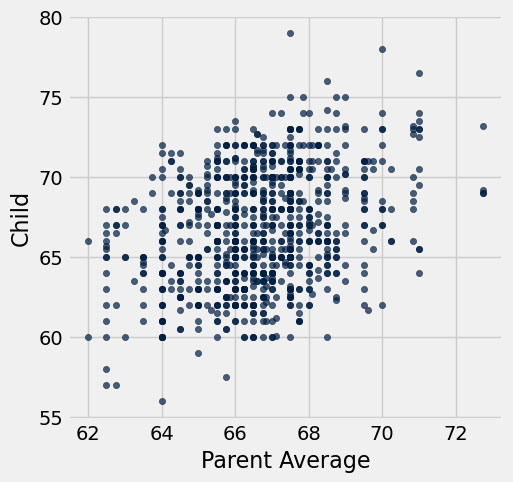

In [29]:
heights.scatter('Parent Average')

In [30]:
close_to_66 = heights.where('Parent Average', are.between(65.5, 66.5))
close_to_66

Parent Average,Child
66,62
66.25,72
66.25,70
66.25,69.5
66.25,69.5
66.25,68
66.25,65
66.25,64
66.25,63
66.25,72


In [31]:
np.average(close_to_66.column('Child'))

66.086407766990291

In [32]:
def predict_child(p_avg):
    close_points = heights.where('Parent Average', are.between(p_avg - 0.5, p_avg + 0.5))
    return np.average(close_points.column('Child'))   

In [33]:
predict_child(66)

66.086407766990291

In [34]:
predict_child(70)

68.561904761904756

In [35]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'Parent Average')
)
heights_with_predictions

Parent Average,Child,Prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158
71,72.5,70.4158
71,65.5,70.4158
71,65.5,70.4158
69.5,71,68.5025
69.5,68,68.5025


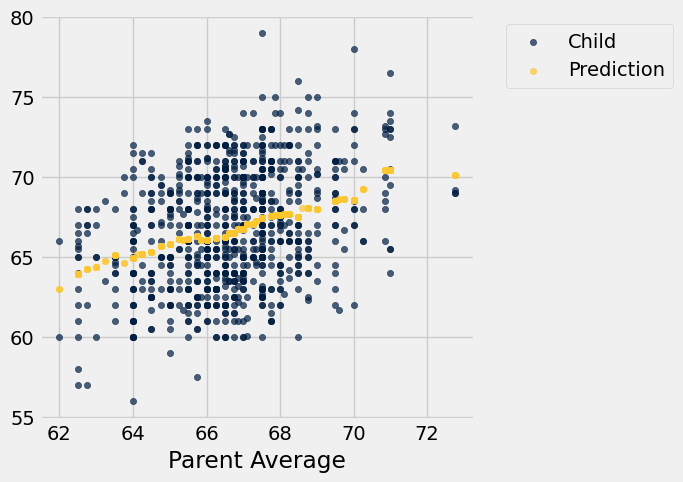

In [36]:
heights_with_predictions.scatter('Parent Average')

# Grouping

In [37]:
cones = Table.read_table('data/cones.csv')
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
vanilla,white,3.5
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [38]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2
vanilla,1


In [39]:
cones.group('Flavor', np.average)

Flavor,Color average,Price average
bubblegum,,4.75
chocolate,,5.08333
strawberry,,4.4
vanilla,,3.5


In [40]:
cones.drop('Color').group('Flavor', max)

Flavor,Price max
bubblegum,4.75
chocolate,5.25
strawberry,5.25
vanilla,3.5


In [41]:
pokemon = Table.read_table('data/pokemon.csv')
pokemon

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,0.25,1,2,1,1,2,1,1,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,nan,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1,1,1,0.5,1,0.5,1,1,0.5,2,0.5,1,1,1,2,0.5,2,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,nan,19,1,0
"['Blaze', 'Solar Power']",0.25,1,1,2,0.5,0.5,0.5,1,1,0.25,0,1,1,1,1,4,0.5,2,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,nan,9,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,nan,22.5,1,0
"['Torrent', 'Rain Dish']",1,1,1,2,1,1,0.5,1,1,2,1,0.5,1,1,1,1,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,nan,85.5,1,0
"['Shield Dust', 'Run Away']",1,1,1,1,1,0.5,2,2,1,0.5,0.5,1,1,1,1,2,1,1,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50,10,20,20,45,bug,nan,2.9,1,0


In [42]:
pokemon.group('type1')

type1,count
bug,72
dark,29
dragon,27
electric,39
fairy,18
fighting,28
fire,52
flying,3
ghost,27
grass,78


In [43]:
pokemon.select('type1', 'hp').group('type1', np.mean).show()

type1,hp mean
bug,56.7222
dark,72.5517
dragon,79.8519
electric,60.5128
fairy,73.9444
fighting,71.4286
fire,68.7308
flying,68
ghost,63.3704
grass,65.359


In [44]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
vanilla,white,3.5
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [45]:
cones.group(make_array('Flavor', 'Color'))

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2
vanilla,white,1


In [46]:
cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2
vanilla,white,1


In [47]:
cones.group(['Flavor', 'Color'], min)

Flavor,Color,Price min
bubblegum,pink,4.75
chocolate,dark brown,5.25
chocolate,light brown,4.75
strawberry,pink,3.55
vanilla,white,3.5


# Pivot

In [48]:
cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry,vanilla
dark brown,0,2,0,0
light brown,0,1,0,0
pink,1,0,2,0
white,0,0,0,1


In [49]:
cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry,vanilla
dark brown,0,10.5,0,0
light brown,0,4.75,0,0
pink,4.75,0,8.8,0
white,0,0,0,3.5


In [50]:
cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8
vanilla,white,3.5


In [51]:
education_income = Table.read_table('data/educ_inc.csv')
educ2014 = education_income.where('Year', '1/1/14 0:00').where('Age', are.not_equal_to('00 to 17'))
educ2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


In [52]:
educ2014 = educ2014.select(3, 4, 5)
educ2014

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


In [53]:
totals = educ2014.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


In [54]:
dist = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'No high school diploma', percents(totals.column(3))
)
dist

Personal Income,Bachelor's degree or higher,No high school diploma
"A: 0 to 4,999",6.75,18.46
"B: 5,000 to 9,999",3.82,9.95
"C: 10,000 to 14,999",5.31,11
"D: 15,000 to 24,999",9.07,19.9
"E: 25,000 to 34,999",8.14,14.76
"F: 35,000 to 49,999",13.17,12.44
"G: 50,000 to 74,999",18.7,8.35
"H: 75,000 and over",35.03,5.13


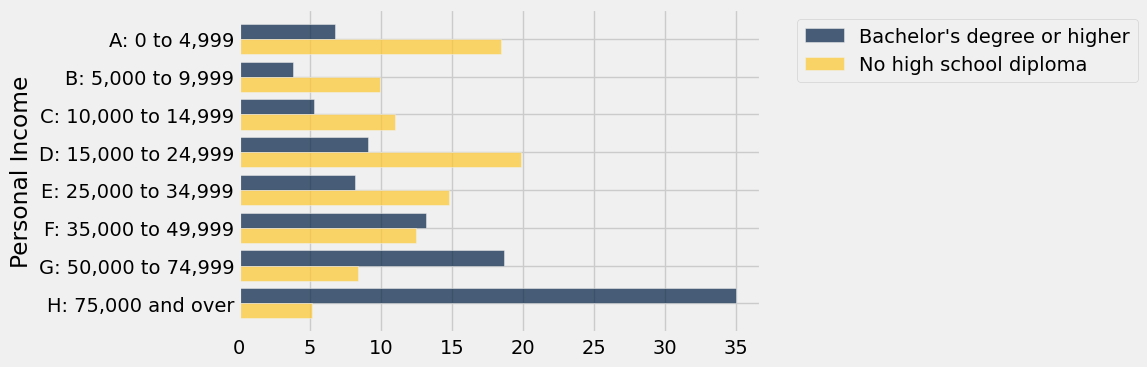

In [55]:
dist.barh(0)

# Join

In [56]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
vanilla,white,3.5
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [57]:
ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [58]:
cones.join('Flavor', ratings, 'Kind')

Flavor,Color,Price,Stars
chocolate,light brown,4.75,3.5
chocolate,dark brown,5.25,3.5
chocolate,dark brown,5.25,3.5
strawberry,pink,3.55,2.5
strawberry,pink,5.25,2.5
vanilla,white,3.5,4


# Extended example: Bay Wheels bike share data

In [59]:
trips = Table.read_table('data/202506-baywheels-tripdata.csv.zip')
trips

rideable_type,started_at,ended_at,duration,start_station_name,end_station_name,member_casual
classic_bike,2025-06-30 09:07:18.625,2025-06-30 09:16:12.722,534.097,62nd St at Claremont Ave,Telegraph Ave at 49th St,member
electric_bike,2025-06-03 13:07:55.313,2025-06-03 13:16:31.166,515.853,MLK Jr Way at University Ave,Fulton St at Ashby Ave,member
classic_bike,2025-06-23 09:13:34.202,2025-06-23 09:21:50.823,496.621,Precita Park,Harrison St at 20th St,casual
classic_bike,2025-06-16 13:24:02.794,2025-06-16 13:34:30.657,627.863,San Pablo Park,San Pablo Park,member
electric_bike,2025-06-04 06:47:59.506,2025-06-04 07:00:28.534,749.028,Broadway at 40th St,Bay Street Plaza,casual
electric_bike,2025-06-03 17:38:46.966,2025-06-03 17:47:45.805,538.839,Masonic Ave at Turk St,Masonic Ave at Turk St,casual
electric_bike,2025-06-03 21:41:02.433,2025-06-03 21:47:29.827,387.394,Masonic Ave at Turk St,Haight St at Lyon St,casual
electric_bike,2025-06-15 00:26:46.204,2025-06-15 00:41:38.997,892.793,Masonic Ave at Turk St,34th Ave at Balboa St,member
electric_bike,2025-06-03 21:40:42.205,2025-06-03 21:48:15.143,452.938,Masonic Ave at Turk St,Broderick St at Oak St,casual
classic_bike,2025-06-28 16:01:15.655,2025-06-28 16:07:09.931,354.276,23rd St at San Bruno Ave,20th St at Bryant St,member


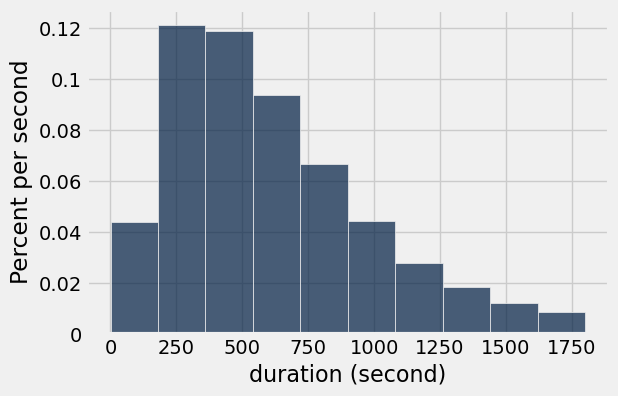

In [67]:
below30 = trips.where('duration', are.below(60*30))
below30.hist('duration', unit='second')

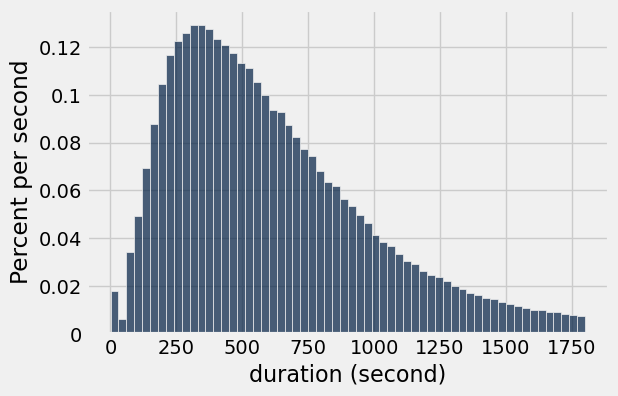

In [68]:
below30.hist('duration', bins=60, unit='second')

In [71]:
below30.group('start_station_name').sort('count', descending=True)

start_station_name,count
San Francisco Caltrain Station - Townsend St,4186
Market St at Steuart St,3433
Market St at 10th St,3191
Powell St BART North,3068
San Francisco Ferry Building,2447
22nd St Caltrain Station,2396
Grove St at Divisadero,2325
Page St at Scott St,2294
Pierce St at Haight St,2269
Sanchez St at 15th St,2205


In [73]:
below30.pivot('start_station_name', 'end_station_name')

end_station_name                             |  Sloat Blvd at The Great Highway to 46th Ave | 10th Ave at E 15th St | 10th Ave at Irving St | 10th St at Chestnut St | 10th St at Empire St | 10th St at Fallon St | 10th St at Mission St | 10th St at University Ave | 11th St at Bryant St | 11th St at Natoma St | 13th St at Webster St | 14th Ave at Geary Blvd | 14th St at Filbert St | 14th St at Mandela Pkwy | 14th St at Mission St | 15th St at Potrero Ave | 15th St at Valencia St | 16th St Mission BART North | 16th St Mission BART South | 16th St at Prosper St | 17th Ave at Geary Blvd | 17th St at Dolores St | 17th St at Santa Clara St | 17th St at Valencia St | 18th Ave at California St | 18th St at Noe St | 19th St at Florida St | 19th St at Mission St | 19th St at William St | 19th Street BART | 1st St at Folsom St | 1st St at Younger Ave | 20th St at Bryant St | 20th St at Dolores St | 2100 Powell St | 21st Ave at Noriega St | 21st St at 5th Ave | 21st St at Valencia St | 22nd St Caltrain Station | 22nd St at Dolores St | 22nd St at Potrero Ave | 22nd St at Valencia St | 22nd St at William St | 23rd Ave at Clement St | 23rd Ave at Foothill Blvd | 23rd St at San Bruno Ave | 23rd St at Santa Clara St | 23rd St at Taylor St | 23rd St at Telegraph Ave | 23rd St at Tennessee St | 24th Ave at Quintara St | 24th St BART | 24th St at Chattanooga St | 24th St at Market St | 25th Ave at Irving St | 26th Ave at Clement St | 26th Ave at International Blvd | 26th Ave at Noriega St | 26th St at Broadway | 27th St at San Pablo Ave | 29th St at Church St | 29th St at Tiffany Ave | 2nd Ave at E 18th St | 2nd St at Folsom St | 2nd St at Julian St | 2nd St at Townsend St | 30th Ave | 30th Ave at Noriega St | 30th St at San Jose Ave | 32nd St at Adeline St | 34th Ave at Balboa St | 34th St at Telegraph Ave | 36th Ave at Irving St | 36th Ave at Kirkham St | 36th Ave at Spreckels Lake Dr | 37th Ave at Ortega St | 37th Ave at Rivera St | 37th St at West St | 38th Ave at Balboa St | 3rd St at Keyes St | 3rd St at King St | 40th St at Piedmont Ave | 41st Ave at Irving St | 43rd Ave at Lawton St | 45th Ave at Noriega St | 45th St at MLK Jr Way | 45th St at Manila | 47th St at San Pablo Ave | 48th Ave at Cabrillo St | 4th Ave at E 12th St | 4th St at 16th St | 4th St at Gene Friend Way | 4th St at Harrison St | 4th St at Long Bridge St | 4th St at Mission Bay Blvd S | 4th St at San Carlos St | 52nd St at MLK Jr Way | 53rd St at Hollis St | 55th St at Telegraph Ave | 59th St at Horton St | 5th Ave at Anza St | 5th St at Howard St | 5th St at San Salvador St | 5th St at Taylor St | 5th St at Virginia St | 62nd St at Claremont Ave | 65th St at Hollis St | 6th Ave at E 12th St | 7th Ave at Cabrillo St | 7th Ave at Clement St | 7th Ave at Irving St | 7th Ave at Lawton St | 7th St at Empire St | 7th St at King St | 8th Ave at JFK Dr | 8th St at Brannan St | 8th St at Hooper St | 8th St at Ringold St | 9th Ave at Geary Blvd | 9th St at San Fernando St | Addison St at California St | Addison St at Fourth St | Adeline St at 40th St | Alameda St at Henry Adams St | Alamo Square | Alcatraz Ave at Shattuck Ave | Alemany Blvd at Francis St | Alemany Blvd at Ocean Ave | Alemany Blvd at Silver Ave | Allyne Park | Almaden Blvd at Balbach St | Almaden Blvd at San Fernando St | Anza St at 19th Ave | Anza St at Collins St | Arguello Blvd at Edward St | Arguello Blvd at Geary Blvd | Arlington St at Roanoke St | Asbury St at The Alameda | Ashby BART | Ashton Ave at Holloway Ave | Autumn Parkway at Coleman Ave | Auzerais Ave at Lincoln Ave | Auzerais Ave at Los Gatos Creek Trail | Backesto Park | Balboa Park | Balboa Park BART | Balboa Park BART 2 | Bancroft Way at College Ave | Bancroft Way at Telegraph Ave | Battery St at Filbert St | Bay Pl at Vernon St | Bay St at Fillmore St | Bay Street Plaza | Beale St at Harrison St | Berkeley Civic Center | Berry St at 4th St | Berry St at King St | Berryessa BART | Bestor Art Park | Bird Ave at Coe Ave | Bird Ave at Willow St | Bo

In [74]:
below30.pivot('start_station_name', 'end_station_name', values='duration', collect=min)

end_station_name                             |  Sloat Blvd at The Great Highway to 46th Ave | 10th Ave at E 15th St | 10th Ave at Irving St | 10th St at Chestnut St | 10th St at Empire St | 10th St at Fallon St | 10th St at Mission St | 10th St at University Ave | 11th St at Bryant St | 11th St at Natoma St | 13th St at Webster St | 14th Ave at Geary Blvd | 14th St at Filbert St | 14th St at Mandela Pkwy | 14th St at Mission St | 15th St at Potrero Ave | 15th St at Valencia St | 16th St Mission BART North | 16th St Mission BART South | 16th St at Prosper St | 17th Ave at Geary Blvd | 17th St at Dolores St | 17th St at Santa Clara St | 17th St at Valencia St | 18th Ave at California St | 18th St at Noe St | 19th St at Florida St | 19th St at Mission St | 19th St at William St | 19th Street BART | 1st St at Folsom St | 1st St at Younger Ave | 20th St at Bryant St | 20th St at Dolores St | 2100 Powell St | 21st Ave at Noriega St | 21st St at 5th Ave | 21st St at Valencia St | 22nd St Caltrain Station | 22nd St at Dolores St | 22nd St at Potrero Ave | 22nd St at Valencia St | 22nd St at William St | 23rd Ave at Clement St | 23rd Ave at Foothill Blvd | 23rd St at San Bruno Ave | 23rd St at Santa Clara St | 23rd St at Taylor St | 23rd St at Telegraph Ave | 23rd St at Tennessee St | 24th Ave at Quintara St | 24th St BART | 24th St at Chattanooga St | 24th St at Market St | 25th Ave at Irving St | 26th Ave at Clement St | 26th Ave at International Blvd | 26th Ave at Noriega St | 26th St at Broadway | 27th St at San Pablo Ave | 29th St at Church St | 29th St at Tiffany Ave | 2nd Ave at E 18th St | 2nd St at Folsom St | 2nd St at Julian St | 2nd St at Townsend St | 30th Ave | 30th Ave at Noriega St | 30th St at San Jose Ave | 32nd St at Adeline St | 34th Ave at Balboa St | 34th St at Telegraph Ave | 36th Ave at Irving St | 36th Ave at Kirkham St | 36th Ave at Spreckels Lake Dr | 37th Ave at Ortega St | 37th Ave at Rivera St | 37th St at West St | 38th Ave at Balboa St | 3rd St at Keyes St | 3rd St at King St | 40th St at Piedmont Ave | 41st Ave at Irving St | 43rd Ave at Lawton St | 45th Ave at Noriega St | 45th St at MLK Jr Way | 45th St at Manila | 47th St at San Pablo Ave | 48th Ave at Cabrillo St | 4th Ave at E 12th St | 4th St at 16th St | 4th St at Gene Friend Way | 4th St at Harrison St | 4th St at Long Bridge St | 4th St at Mission Bay Blvd S | 4th St at San Carlos St | 52nd St at MLK Jr Way | 53rd St at Hollis St | 55th St at Telegraph Ave | 59th St at Horton St | 5th Ave at Anza St | 5th St at Howard St | 5th St at San Salvador St | 5th St at Taylor St | 5th St at Virginia St | 62nd St at Claremont Ave | 65th St at Hollis St | 6th Ave at E 12th St | 7th Ave at Cabrillo St | 7th Ave at Clement St | 7th Ave at Irving St | 7th Ave at Lawton St | 7th St at Empire St | 7th St at King St | 8th Ave at JFK Dr | 8th St at Brannan St | 8th St at Hooper St | 8th St at Ringold St | 9th Ave at Geary Blvd | 9th St at San Fernando St | Addison St at California St | Addison St at Fourth St | Adeline St at 40th St | Alameda St at Henry Adams St | Alamo Square | Alcatraz Ave at Shattuck Ave | Alemany Blvd at Francis St | Alemany Blvd at Ocean Ave | Alemany Blvd at Silver Ave | Allyne Park | Almaden Blvd at Balbach St | Almaden Blvd at San Fernando St | Anza St at 19th Ave | Anza St at Collins St | Arguello Blvd at Edward St | Arguello Blvd at Geary Blvd | Arlington St at Roanoke St | Asbury St at The Alameda | Ashby BART | Ashton Ave at Holloway Ave | Autumn Parkway at Coleman Ave | Auzerais Ave at Lincoln Ave | Auzerais Ave at Los Gatos Creek Trail | Backesto Park | Balboa Park | Balboa Park BART | Balboa Park BART 2 | Bancroft Way at College Ave | Bancroft Way at Telegraph Ave | Battery St at Filbert St | Bay Pl at Vernon St | Bay St at Fillmore St | Bay Street Plaza | Beale St at Harrison St | Berkeley Civic Center | Berry St at 4th St | Berry St at King St | Berryessa BART | Bestor Art Park | Bird Ave at Coe Ave | Bird Ave at Willow St | Bo

In [76]:
stations = Table.read_table('data/stations.csv')
stations

station_name,lat,long
Sloat Blvd at The Great Highway to 46th Ave,37.7353,-122.505
10th Ave at E 15th St,37.7927,-122.249
10th Ave at Irving St,37.7642,-122.467
10th St at Chestnut St,37.8064,-122.286
10th St at Empire St,37.3494,-121.888
10th St at Fallon St,37.7977,-122.263
10th St at Mission St,37.3557,-121.892
10th St at University Ave,37.8691,-122.293
11th St at Bryant St,37.77,-122.412
11th St at Natoma St,37.7735,-122.416


In [82]:
Marker.map_table(stations.select('lat', 'long', 'station_name').relabel('station_name', 'labels'))

In [83]:
below30

rideable_type,started_at,ended_at,duration,start_station_name,end_station_name,member_casual
classic_bike,2025-06-30 09:07:18.625,2025-06-30 09:16:12.722,534.097,62nd St at Claremont Ave,Telegraph Ave at 49th St,member
electric_bike,2025-06-03 13:07:55.313,2025-06-03 13:16:31.166,515.853,MLK Jr Way at University Ave,Fulton St at Ashby Ave,member
classic_bike,2025-06-23 09:13:34.202,2025-06-23 09:21:50.823,496.621,Precita Park,Harrison St at 20th St,casual
classic_bike,2025-06-16 13:24:02.794,2025-06-16 13:34:30.657,627.863,San Pablo Park,San Pablo Park,member
electric_bike,2025-06-04 06:47:59.506,2025-06-04 07:00:28.534,749.028,Broadway at 40th St,Bay Street Plaza,casual
electric_bike,2025-06-03 17:38:46.966,2025-06-03 17:47:45.805,538.839,Masonic Ave at Turk St,Masonic Ave at Turk St,casual
electric_bike,2025-06-03 21:41:02.433,2025-06-03 21:47:29.827,387.394,Masonic Ave at Turk St,Haight St at Lyon St,casual
electric_bike,2025-06-15 00:26:46.204,2025-06-15 00:41:38.997,892.793,Masonic Ave at Turk St,34th Ave at Balboa St,member
electric_bike,2025-06-03 21:40:42.205,2025-06-03 21:48:15.143,452.938,Masonic Ave at Turk St,Broderick St at Oak St,casual
classic_bike,2025-06-28 16:01:15.655,2025-06-28 16:07:09.931,354.276,23rd St at San Bruno Ave,20th St at Bryant St,member


In [88]:
starts = below30.group('start_station_name').sort('count', descending=True)
starts

start_station_name,count
San Francisco Caltrain Station - Townsend St,4186
Market St at Steuart St,3433
Market St at 10th St,3191
Powell St BART North,3068
San Francisco Ferry Building,2447
22nd St Caltrain Station,2396
Grove St at Divisadero,2325
Page St at Scott St,2294
Pierce St at Haight St,2269
Sanchez St at 15th St,2205


In [90]:
starts = starts.join('start_station_name', stations, 'station_name')
starts

start_station_name,count,lat,long
Sloat Blvd at The Great Highway to 46th Ave,4,37.7353,-122.505
10th Ave at E 15th St,30,37.7927,-122.249
10th Ave at Irving St,715,37.7642,-122.467
10th St at Chestnut St,58,37.8064,-122.286
10th St at Empire St,49,37.3494,-121.888
10th St at Fallon St,138,37.7977,-122.263
10th St at Mission St,102,37.3557,-121.892
10th St at University Ave,76,37.8691,-122.293
11th St at Bryant St,1101,37.77,-122.412
11th St at Natoma St,929,37.7735,-122.416


In [100]:
start_map_data = starts.select('lat', 'long', 'start_station_name').with_columns(
    'areas', starts.column('count') * 0.75,
    'colors', 'blue'
)
start_map_data = start_map_data.relabel('start_station_name', 'labels')
start_map_data

lat,long,labels,areas,colors
37.7353,-122.505,Sloat Blvd at The Great Highway to 46th Ave,3,blue
37.7927,-122.249,10th Ave at E 15th St,22.5,blue
37.7642,-122.467,10th Ave at Irving St,536.25,blue
37.8064,-122.286,10th St at Chestnut St,43.5,blue
37.3494,-121.888,10th St at Empire St,36.75,blue
37.7977,-122.263,10th St at Fallon St,103.5,blue
37.3557,-121.892,10th St at Mission St,76.5,blue
37.8691,-122.293,10th St at University Ave,57,blue
37.77,-122.412,11th St at Bryant St,825.75,blue
37.7735,-122.416,11th St at Natoma St,696.75,blue


In [101]:
Circle.map_table(start_map_data)

# Miscellaneous things Lawton needs to teach you

In [1]:
def f():
    print(42)

def g():
    return 42

In [2]:
f()

42


In [3]:
g()

42

In [4]:
f() * 2

42


TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

In [6]:
# functions that print things give nothing back

In [5]:
g() * 2

84

In [18]:
t = Table().with_columns('x', make_array(1, 2, 3),
                         'y', make_array(4, 5, 6),
                         'z', make_array(7, 8, 9))
t

x,y,z
1,4,7
2,5,8
3,6,9


In [19]:
def multiply_add(row):
    return row.item('x') * row.item('y') + row.item('z')

In [20]:
t.apply(multiply_add)  # if you don't add a column name your function gets the whole row passed to it

array([11, 18, 27])